In [2026]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

import warnings

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score


%matplotlib inline
warnings.filterwarnings('ignore')

In [2027]:
lead_df=pd.read_csv(r"C:\Users\janes\Downloads\001Upgrad\002-MachineLearning\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

# 1. Reading and understanding the data

In [2028]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2029]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 2. Data cleaning

In [2030]:
#drop 'Prospect ID' as it's just a unique identifier
lead_df.drop(['Prospect ID'],1,inplace=True)

In [2031]:
#replace the value 'Select' with nan
lead_df = lead_df.replace('Select', np.nan)

In [2032]:
#checking percentage of null values in each column
round((lead_df.isnull().sum()/len(lead_df.index))*100,2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
I agree to pay the amount through cheque          0.00
A free cop

In [2033]:
# removing columns whch column containd more than 40% of Missing Values
rem_cols=lead_df.columns[round((lead_df.isnull().sum()/len(lead_df))*100)>=40]
lead_df=lead_df.drop(rem_cols,1)

In [2034]:
round((lead_df.isnull().sum()/len(lead_df.index))*100,2).sort_values(ascending = False)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Lead Number                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

In [2035]:
lead_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [2036]:
#replace nan in 'Specialization' with 'Finance Management'
lead_df['Specialization']=lead_df['Specialization'].replace(np.nan,'Finance Management')

In [2037]:
lead_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [2038]:
#dropping Tags as there is no significance in the analysis
lead_df=lead_df.drop('Tags',1)

In [2039]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [2040]:
#dropping 'What matters most to you in choosing a course' since it has same values for almost all the records
lead_df=lead_df.drop('What matters most to you in choosing a course',1)

In [2041]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2042]:
#replacing nan with "Unemployed" as its common occurance in 'What is your current occupation' Column
lead_df['What is your current occupation']=lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

In [2043]:
lead_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [2044]:
# replacing nan with "India" as country
lead_df['Country']=lead_df['Country'].replace(np.nan,'India')

In [2045]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [2046]:
#replacing nan in 'Last Activity' with 'Email Opened'
lead_df['Last Activity']=lead_df['Last Activity'].replace(np.nan,'Email Opened')

In [2047]:
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [2048]:
#replacing nan in 'Lead Source' with 'Google'
lead_df['Lead Source']=lead_df['Lead Source'].replace(np.nan,'Google')

In [2049]:
lead_df['Lead Source']=lead_df['Lead Source'].replace('google','Google')

In [2050]:
#checking the percentage of null values in the df after data clean-up
round((lead_df.isnull().sum()/len(lead_df.index))*100,2).sort_values(ascending = False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Lead Number                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Origin                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Country                                     0.00
Last Activity                               0.00
Total Time Spent on 

#### Outliers in TotalVisits and Page Views Per Visit

In [2051]:
lead_df["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [2052]:
lead_df["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [2053]:
#replace the null values with median
lead_df['TotalVisits']=lead_df['TotalVisits'].fillna(lead_df['TotalVisits'].median())
lead_df['Page Views Per Visit']=lead_df['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median())

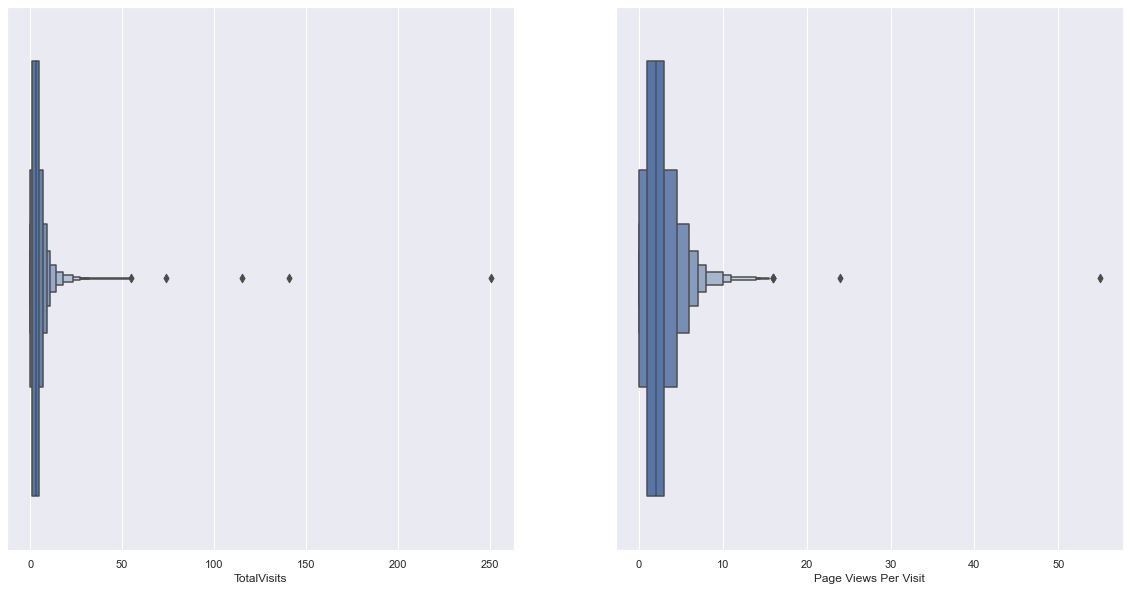

In [2054]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.boxenplot(lead_df["TotalVisits"])
plt.subplot(1,2,2)
sns.boxenplot(lead_df["Page Views Per Visit"])
plt.show()

In [2055]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9240 non-null   int64  
 1   Lead Origin                               9240 non-null   object 
 2   Lead Source                               9240 non-null   object 
 3   Do Not Email                              9240 non-null   object 
 4   Do Not Call                               9240 non-null   object 
 5   Converted                                 9240 non-null   int64  
 6   TotalVisits                               9240 non-null   float64
 7   Total Time Spent on Website               9240 non-null   int64  
 8   Page Views Per Visit                      9240 non-null   float64
 9   Last Activity                             9240 non-null   object 
 10  Country                             

In [2056]:
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,No,No,No,Modified


In [2057]:
lead_df['Lead Number'].nunique()

9240

In [2058]:
#Make Lead Number as Index as it's unique for all the records
lead_df=lead_df.set_index('Lead Number')

In [2059]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,No,No,No,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


In [2060]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Country                                   9240 non-null   object 
 10  Specialization               

In [2061]:
lead_df["Page Views Per Visit"].dtype

dtype('float64')

In [2062]:
cat_cols=list(lead_df.loc[:, lead_df.dtypes == np.object].columns)
num_cols=list(lead_df.loc[:, lead_df.dtypes == np.int64].columns)
num_cols=num_cols+(list(lead_df.loc[:, lead_df.dtypes == np.float64].columns))

In [2063]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [2064]:
num_cols

['Converted',
 'Total Time Spent on Website',
 'TotalVisits',
 'Page Views Per Visit']

In [2065]:
for i in enumerate(cat_cols):
    print(i[0],i[1])

0 Lead Origin
1 Lead Source
2 Do Not Email
3 Do Not Call
4 Last Activity
5 Country
6 Specialization
7 What is your current occupation
8 Search
9 Magazine
10 Newspaper Article
11 X Education Forums
12 Newspaper
13 Digital Advertisement
14 Through Recommendations
15 Receive More Updates About Our Courses
16 Update me on Supply Chain Content
17 Get updates on DM Content
18 I agree to pay the amount through cheque
19 A free copy of Mastering The Interview
20 Last Notable Activity


In [2066]:
for col in cat_cols:
    print("\nColumn name: "+col+"\n")
    print(round((lead_df[col].value_counts()/lead_df[col].count())*100,2))


Column name: Lead Origin

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

Column name: Lead Source

Google               31.48
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
Pay per Click Ads     0.01
blog                  0.01
WeLearn               0.01
welearnblog_Home      0.01
youtubechannel        0.01
testone               0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

Column name: Do Not Email

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

Column name: Do Not Call

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float

In [2067]:
#dropping the columns which are highly skewed
drop_cols=["Do Not Email","Do Not Call","Country","What is your current occupation","Search","Magazine","Newspaper Article"\
          ,"X Education Forums","Newspaper","Digital Advertisement","Through Recommendations"\
           ,"Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content"\
          ,"I agree to pay the amount through cheque"]
lead_df.drop(drop_cols,1,inplace=True)

In [2068]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 794.

In [2069]:
#drop "Last Notable Activity" as it's almost same as "Last Activity"
lead_df.drop("Last Notable Activity",1, inplace=True)

In [2070]:
cat_cols=list(lead_df.loc[:, lead_df.dtypes == np.object].columns)
num_cols=list(lead_df.loc[:, lead_df.dtypes == np.int64].columns)
num_cols=num_cols+(list(lead_df.loc[:, lead_df.dtypes == np.float64].columns))

In [2071]:
for col in cat_cols:
    print("\nColumn name: "+col+"\n")
    print(round((lead_df[col].value_counts()/lead_df[col].count())*100,2))


Column name: Lead Origin

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

Column name: Lead Source

Google               31.48
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
Pay per Click Ads     0.01
blog                  0.01
WeLearn               0.01
welearnblog_Home      0.01
youtubechannel        0.01
testone               0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

Column name: Last Activity

Email Opened                    38.31
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website       

In [2072]:
#convert Yes to 1 and No to 0
lead_df['A free copy of Mastering The Interview']=lead_df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

# 3. Exploratory Data Analysis

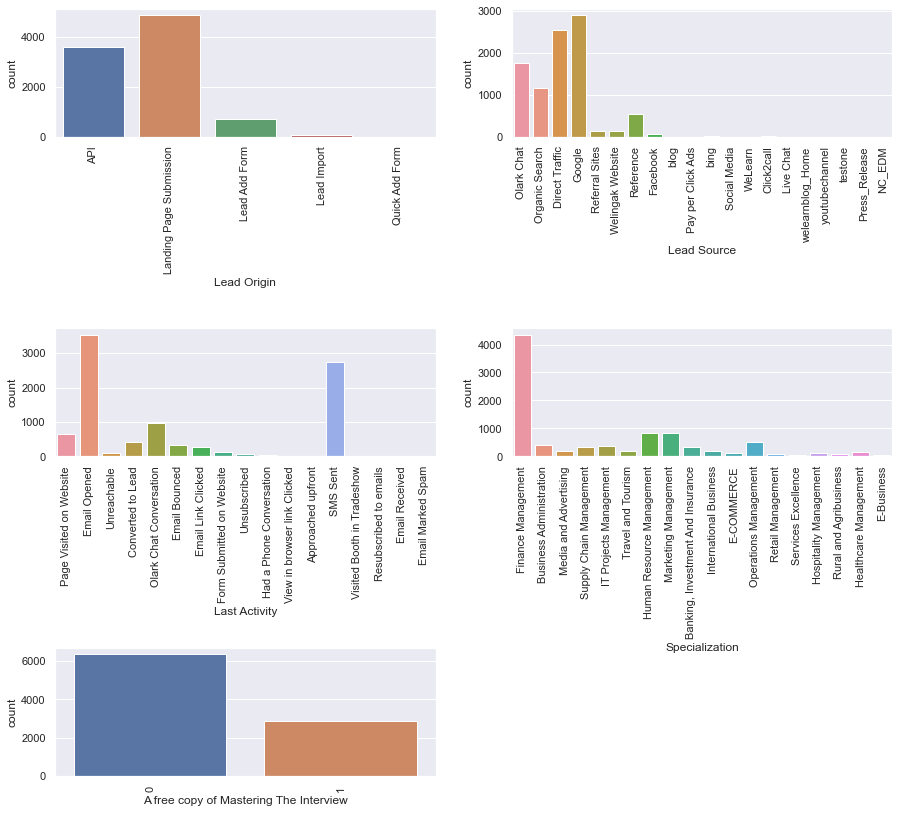

In [2073]:
plt.figure(figsize=(15,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.5 )
for i in enumerate(cat_cols):
    plt.subplot(4,2, i[0]+1)
    #bar_container = ax.bar(fruit_names, fruit_counts)
    sns.countplot(i[1],data=lead_df)
    plt.xticks(rotation=90)
plt.show()

In [2074]:
lead_df['Specialization'].value_counts()

Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [2075]:
#replace the least occuring labels with "Other" for the columns with lot of lables
for col in cat_cols:
    if(col != "Lead Origin"):
        col_dict_ls=dict(round((lead_df[col].value_counts()/lead_df[col].count())*100,2)<1.50)
        for i in col_dict_ls.keys():
            if col_dict_ls[i]==True:
                lead_df[col]=lead_df[col].replace(i,'Other')

In [2076]:
for col in cat_cols:
    print("\nColumn name: "+col+"\n")
    print(round((lead_df[col].value_counts()/lead_df[col].count())*100,2))


Column name: Lead Origin

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

Column name: Lead Source

Google              31.48
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Other                2.20
Welingak Website     1.54
Name: Lead Source, dtype: float64

Column name: Last Activity

Email Opened               38.31
SMS Sent                   29.71
Olark Chat Conversation    10.53
Page Visited on Website     6.93
Converted to Lead           4.63
Email Bounced               3.53
Other                       3.47
Email Link Clicked          2.89
Name: Last Activity, dtype: float64

Column name: Specialization

Finance Management                   47.14
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44


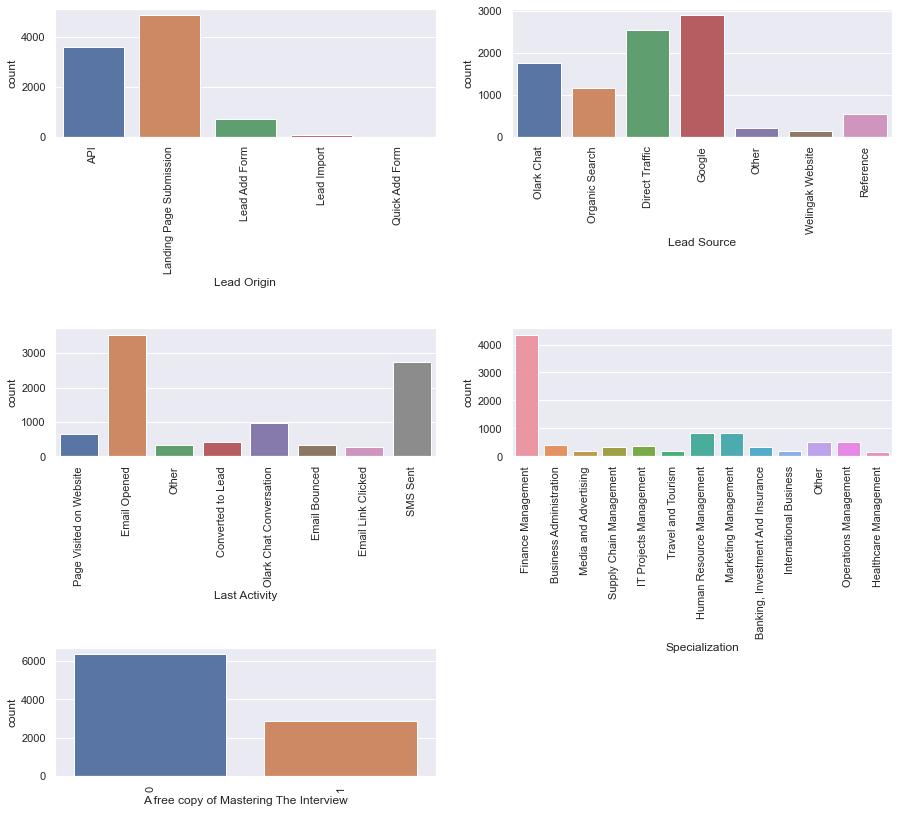

In [2077]:
plt.figure(figsize=(15,20))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1.5 )
for i in enumerate(cat_cols):
    plt.subplot(4,2, i[0]+1)
    #bar_container = ax.bar(fruit_names, fruit_counts)
    sns.countplot(i[1],data=lead_df)
    plt.xticks(rotation=90)
plt.show()

Insights :-
- In Lead Origin, API and Landing Page Submission are the origins of the most of the leads
- In Lead Source, Direct Traffic and Google are the two main source for Leads
- Email Opened and SMS Sent constitute most for the Last Activity
- Most of the people chooses Finance Management Specialization rather than other Specialization

#### Bivariate Analysis

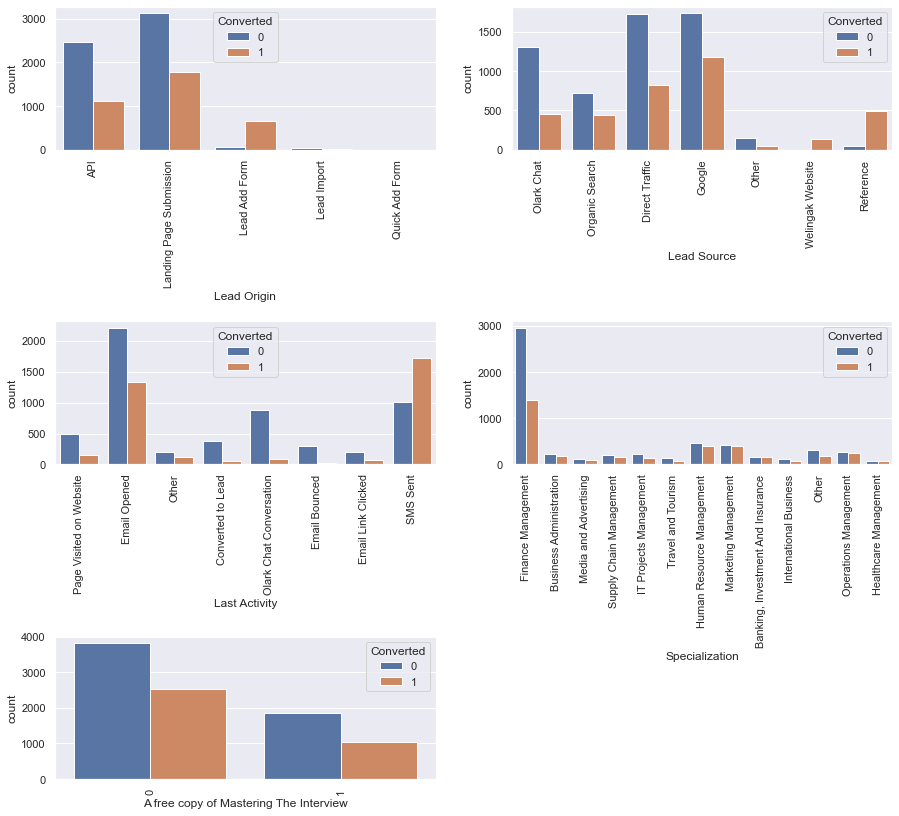

In [2078]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(cat_cols):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = lead_df)
    plt.xticks(rotation=90)
# plt.savefig('cate bivar.png',dpi=300,transparent=True)
plt.show()

Insights :-
- In Lead Source, Google and Direct Traffic has more number of leads
- Reference and Welingak website has the higher conversion rate
- In Last Activity, SMS and Email have high number of leads and the conversion rate is higher for the SMS
- In Last Notable Activity it's mostly same as Last Activity.
- In Specialization the most of the leads are comes from Finance management but here Hot leads are lesseer than Cold leads.

# 4. Data Preparation and Features Selection

In [2079]:
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview
Lead Number,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,0
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,1
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,0


In [2080]:
dummies_df=pd.get_dummies(lead_df[cat_cols],drop_first=True)
dummies_df.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,...,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660728,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660681,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2081]:
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   A free copy of Mastering The Interview    9240 non-null   int64
 1   Lead Origin_Landing Page Submission       9240 non-null   uint8
 2   Lead Origin_Lead Add Form                 9240 non-null   uint8
 3   Lead Origin_Lead Import                   9240 non-null   uint8
 4   Lead Origin_Quick Add Form                9240 non-null   uint8
 5   Lead Source_Google                        9240 non-null   uint8
 6   Lead Source_Olark Chat                    9240 non-null   uint8
 7   Lead Source_Organic Search                9240 non-null   uint8
 8   Lead Source_Other                         9240 non-null   uint8
 9   Lead Source_Reference                     9240 non-null   uint8
 10  Lead Source_Welingak Website              9240 non-nu

In [2082]:
lead_df=pd.concat([lead_df,dummies_df],axis=1)
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,A free copy of Mastering The Interview,A free copy of Mastering The Interview,...,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Finance Management,0,0,...,0,0,0,0,0,0,0,0,0,0
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Finance Management,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,1,1,...,0,0,0,0,0,0,0,0,0,0
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Media and Advertising,0,0,...,0,0,0,0,0,1,0,0,0,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Finance Management,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2083]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'A free copy of Mastering The Interview']

In [2084]:
lead_df.drop(cat_cols,axis=1,inplace=True)

In [2085]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 660737 to 579533
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Converted                                 9240 non-null   int64  
 1   TotalVisits                               9240 non-null   float64
 2   Total Time Spent on Website               9240 non-null   int64  
 3   Page Views Per Visit                      9240 non-null   float64
 4   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 6   Lead Origin_Lead Import                   9240 non-null   uint8  
 7   Lead Origin_Quick Add Form                9240 non-null   uint8  
 8   Lead Source_Google                        9240 non-null   uint8  
 9   Lead Source_Olark Chat                    9240 non-null   uint8  
 10  Lead Source_Organic Search   

#### Splitting the dataframe into train and test sets

In [2086]:
X=lead_df.iloc[:,1:]
y=lead_df[['Converted']]

In [2087]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
660728,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
660727,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660681,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2088]:
y.head()

,Converted
Lead Number,
660737,0
660728,0
660727,1
660719,0
660681,1


In [2089]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=.7,test_size=.3,random_state=100)

#### Scaling

In [2090]:
scaler=StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=\
scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

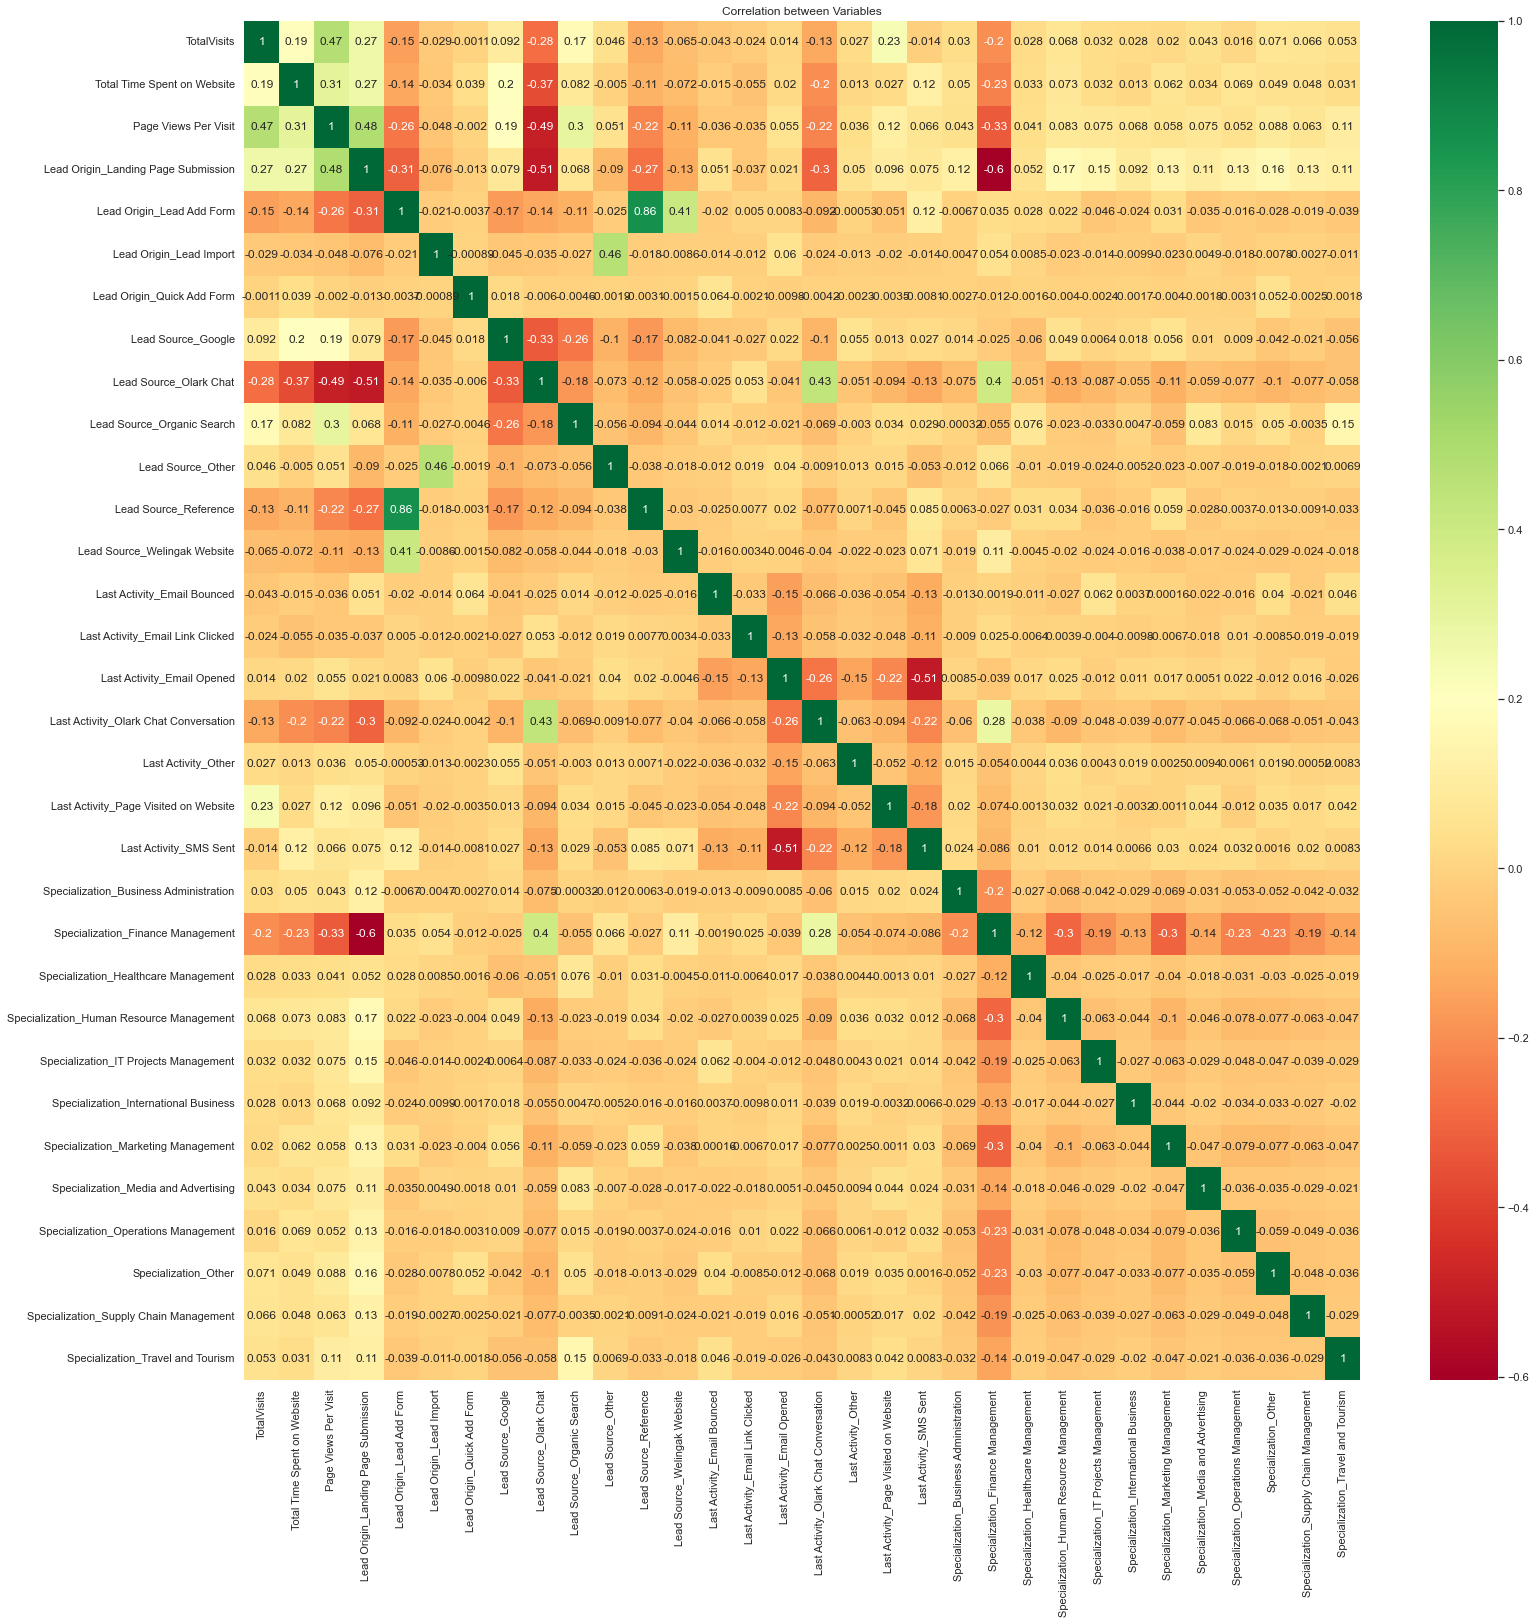

In [2091]:
plt.figure(figsize=(25, 25))
sns.heatmap(X_train.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

#### Feature selection

In [2092]:
logreg=LogisticRegression()
rfe=RFE(logreg,20)
rfe=rfe.fit(X_train,y_train)
rfe.support_

array([False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
       False, False,  True, False, False])

In [2093]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 5),
 ('Lead Source_Other', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 7),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hum

In [2094]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_International Business', 'Specialization_Other'],
      dtype='object')

In [2095]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Specialization_Business Administration',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

# Building Logistic Regression Model

#### Model 1

In [2096]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2919.0
Date:                Tue, 21 Mar 2023   Deviance:                       5837.9
Time:                        00:10:14   Pearson chi2:                 6.56e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8702      0.224     -8.340      0.000      -2.310      -1.431
Total Time Spent on Website               1.0947      0.038     28.876      0.000       1.020       1.169
Lead Origin_Landing Page Submission      -0.4831      0.102     -4.740      0.000      -0.683      -0.283
Lead Origin_Lead Add Form                 2.6108      0.472      5.529      0.000       1.685       3.536
Lead Origin_Lead Import                  -0.3512      0.528     -0.666      0.506      -1.385       0.683
Lead Origin_Quick Add Form               19.7201   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                        0.2694      0.077      3.483      0.000       0.118       0.421
Lead Source_Olark Chat                    1.1232      0.126      8.892      0.000       0.876       1.371
Lead Source_Reference                     1.0938      0.506      2.163      0.031       0.103       2.085
Lead Source_Welingak Website              2.8436      0.865      3.289      0.001       1.149       4.538
Last Activity_Email Bounced              -0.8373      0.348     -2.408      0.016      -1.519      -0.156
Last Activity_Email Link Clicked          0.6373      0.286      2.227      0.026       0.076       1.198
Last Activity_Email Opened                1.1872      0.206      5.764      0.000       0.784       1.591
Last Activity_Olark Chat Conversation    -0.3441      0.254     -1.355      0.176      -0.842       0.154
Last Activity_Other                       1.1586      0.264      4.383      0.000       0.640       1.677
Last Activity_Page Visited on Website     0.5435      0.237      2.293      0.022       0.079       1.008
Last Activity_SMS Sent                    2.2433      0.207     10.833      0.000       1.837       2.649
Specialization_Finance Management        -0.5669      0.087     -6.503      0.000      -0.738      -0.396
Specialization_Healthcare Management      0.2903      0.254      1.145      0.252      -0.207       0.787
Specialization_International Business    -0.4676      0.243     -1.922      0.055      -0.944       0.009
Specialization_Other                     -0.1875      0.148     -1.266      0.205      -0.478       0.103
=========================================================================================================
"""

In [2097]:
#calculating VIF

def vifcalc(df):
    vif = pd.DataFrame()

    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [2098]:
vifcalc(X_train[col])

,Features,VIF
2,Lead Origin_Lead Add Form,16.09
7,Lead Source_Reference,13.12
11,Last Activity_Email Opened,4.06
1,Lead Origin_Landing Page Submission,4.02
8,Lead Source_Welingak Website,3.83
15,Last Activity_SMS Sent,3.51
16,Specialization_Finance Management,2.85
6,Lead Source_Olark Chat,2.72
12,Last Activity_Olark Chat Conversation,2.15
5,Lead Source_Google,1.84


In [2099]:
#dropping "Lead Origin_Lead Add Form" as they have high VIF
col=col.drop('Lead Origin_Lead Add Form',1)

#### Model 2

In [2100]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2939.3
Date:                Tue, 21 Mar 2023   Deviance:                       5878.6
Time:                        00:10:15   Pearson chi2:                 6.54e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8122      0.223     -8.130      0.000      -2.249      -1.375
Total Time Spent on Website               1.0737      0.038     28.617      0.000       1.000       1.147
Lead Origin_Landing Page Submission      -0.5651      0.101     -5.609      0.000      -0.763      -0.368
Lead Origin_Lead Import                  -0.4358      0.525     -0.829      0.407      -1.466       0.594
Lead Origin_Quick Add Form               19.5751   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                        0.2864      0.077      3.723      0.000       0.136       0.437
Lead Source_Olark Chat                    1.0344      0.124      8.310      0.000       0.790       1.278
Lead Source_Reference                     3.6062      0.213     16.964      0.000       3.190       4.023
Lead Source_Welingak Website              5.3475      0.733      7.297      0.000       3.911       6.784
Last Activity_Email Bounced              -0.6972      0.340     -2.049      0.040      -1.364      -0.030
Last Activity_Email Link Clicked          0.6436      0.285      2.256      0.024       0.084       1.203
Last Activity_Email Opened                1.2013      0.205      5.855      0.000       0.799       1.604
Last Activity_Olark Chat Conversation    -0.3443      0.253     -1.360      0.174      -0.840       0.152
Last Activity_Other                       1.1965      0.263      4.551      0.000       0.681       1.712
Last Activity_Page Visited on Website     0.5644      0.236      2.393      0.017       0.102       1.027
Last Activity_SMS Sent                    2.2802      0.206     11.053      0.000       1.876       2.685
Specialization_Finance Management        -0.5681      0.087     -6.542      0.000      -0.738      -0.398
Specialization_Healthcare Management      0.3226      0.253      1.277      0.202      -0.173       0.818
Specialization_International Business    -0.4786      0.243     -1.973      0.049      -0.954      -0.003
Specialization_Other                     -0.1910      0.148     -1.293      0.196      -0.480       0.098
=========================================================================================================
"""

In [2101]:
vifcalc(X_train[col])

,Features,VIF
10,Last Activity_Email Opened,4.04
1,Lead Origin_Landing Page Submission,3.97
14,Last Activity_SMS Sent,3.48
15,Specialization_Finance Management,2.85
5,Lead Source_Olark Chat,2.71
11,Last Activity_Olark Chat Conversation,2.15
4,Lead Source_Google,1.84
13,Last Activity_Page Visited on Website,1.53
6,Lead Source_Reference,1.47
8,Last Activity_Email Bounced,1.30


In [2102]:
#dropping "Lead Source_Olark Chat" as it has high p_value
col=col.drop('Lead Source_Olark Chat',1)

#### Model 3

In [2103]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2974.6
Date:                Tue, 21 Mar 2023   Deviance:                       5949.2
Time:                        00:10:15   Pearson chi2:                 6.42e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4321      0.214     -6.702      0.000      -1.851      -1.013
Total Time Spent on Website               0.9836      0.035     27.968      0.000       0.915       1.052
Lead Origin_Landing Page Submission      -0.9369      0.089    -10.499      0.000      -1.112      -0.762
Lead Origin_Lead Import                  -0.9697      0.511     -1.898      0.058      -1.971       0.032
Lead Origin_Quick Add Form               19.6448   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                        0.0259      0.069      0.375      0.707      -0.109       0.161
Lead Source_Reference                     3.0170      0.199     15.162      0.000       2.627       3.407
Lead Source_Welingak Website              4.7432      0.729      6.509      0.000       3.315       6.171
Last Activity_Email Bounced              -0.5778      0.335     -1.723      0.085      -1.235       0.080
Last Activity_Email Link Clicked          0.8270      0.283      2.927      0.003       0.273       1.381
Last Activity_Email Opened                1.3419      0.201      6.663      0.000       0.947       1.737
Last Activity_Olark Chat Conversation    -0.0377      0.248     -0.152      0.879      -0.523       0.448
Last Activity_Other                       1.3231      0.258      5.120      0.000       0.817       1.830
Last Activity_Page Visited on Website     0.6562      0.232      2.830      0.005       0.202       1.111
Last Activity_SMS Sent                    2.4053      0.203     11.856      0.000       2.008       2.803
Specialization_Finance Management        -0.5506      0.086     -6.422      0.000      -0.719      -0.383
Specialization_Healthcare Management      0.2453      0.250      0.982      0.326      -0.244       0.735
Specialization_International Business    -0.4859      0.239     -2.035      0.042      -0.954      -0.018
Specialization_Other                     -0.2138      0.145     -1.473      0.141      -0.498       0.071
=========================================================================================================
"""

In [2104]:
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_Landing Page Submission,3.31
9,Last Activity_Email Opened,3.08
14,Specialization_Finance Management,2.80
13,Last Activity_SMS Sent,2.76
4,Lead Source_Google,1.58
10,Last Activity_Olark Chat Conversation,1.55
12,Last Activity_Page Visited on Website,1.41
5,Lead Source_Reference,1.27
7,Last Activity_Email Bounced,1.24
11,Last Activity_Other,1.20


In [2105]:
#dropping "Last Activity_Email Bounced" as it has high p_value
col=col.drop("Last Activity_Email Bounced",1)

#### Model 4

In [2106]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2976.2
Date:                Tue, 21 Mar 2023   Deviance:                       5952.3
Time:                        00:10:15   Pearson chi2:                 6.44e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6509      0.182     -9.092      0.000      -2.007      -1.295
Total Time Spent on Website               0.9830      0.035     27.958      0.000       0.914       1.052
Lead Origin_Landing Page Submission      -0.9389      0.089    -10.522      0.000      -1.114      -0.764
Lead Origin_Lead Import                  -0.9705      0.511     -1.900      0.057      -1.972       0.031
Lead Origin_Quick Add Form               19.2849   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                        0.0284      0.069      0.411      0.681      -0.107       0.164
Lead Source_Reference                     3.0055      0.199     15.125      0.000       2.616       3.395
Lead Source_Welingak Website              4.7140      0.725      6.498      0.000       3.292       6.136
Last Activity_Email Link Clicked          1.0475      0.259      4.048      0.000       0.540       1.555
Last Activity_Email Opened                1.5618      0.167      9.370      0.000       1.235       1.888
Last Activity_Olark Chat Conversation     0.1814      0.221      0.822      0.411      -0.251       0.614
Last Activity_Other                       1.5427      0.232      6.636      0.000       1.087       1.998
Last Activity_Page Visited on Website     0.8760      0.202      4.330      0.000       0.479       1.273
Last Activity_SMS Sent                    2.6252      0.168     15.583      0.000       2.295       2.955
Specialization_Finance Management        -0.5514      0.086     -6.431      0.000      -0.719      -0.383
Specialization_Healthcare Management      0.2492      0.250      0.997      0.319      -0.241       0.739
Specialization_International Business    -0.4868      0.239     -2.037      0.042      -0.955      -0.018
Specialization_Other                     -0.2136      0.145     -1.472      0.141      -0.498       0.071
=========================================================================================================
"""

In [2107]:
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_Landing Page Submission,2.85
8,Last Activity_Email Opened,2.71
13,Specialization_Finance Management,2.50
12,Last Activity_SMS Sent,2.45
4,Lead Source_Google,1.57
9,Last Activity_Olark Chat Conversation,1.48
11,Last Activity_Page Visited on Website,1.34
5,Lead Source_Reference,1.24
10,Last Activity_Other,1.17
0,Total Time Spent on Website,1.16


In [2108]:
#dropping "Lead Origin_Quick Add Form" as it has high p_value
col=col.drop("Lead Origin_Quick Add Form",1)

#### Model 5

In [2109]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2976.4
Date:                Tue, 21 Mar 2023   Deviance:                       5952.8
Time:                        00:10:15   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6449      0.181     -9.088      0.000      -2.000      -1.290
Total Time Spent on Website               0.9837      0.035     27.993      0.000       0.915       1.053
Lead Origin_Landing Page Submission      -0.9407      0.089    -10.549      0.000      -1.116      -0.766
Lead Origin_Lead Import                  -0.9709      0.511     -1.900      0.057      -1.972       0.031
Lead Source_Google                        0.0289      0.069      0.418      0.676      -0.106       0.164
Lead Source_Reference                     3.0051      0.199     15.123      0.000       2.616       3.395
Lead Source_Welingak Website              4.7140      0.725      6.499      0.000       3.292       6.136
Last Activity_Email Link Clicked          1.0425      0.258      4.034      0.000       0.536       1.549
Last Activity_Email Opened                1.5567      0.166      9.369      0.000       1.231       1.882
Last Activity_Olark Chat Conversation     0.1762      0.220      0.800      0.424      -0.255       0.608
Last Activity_Other                       1.5375      0.232      6.624      0.000       1.083       1.992
Last Activity_Page Visited on Website     0.8707      0.202      4.313      0.000       0.475       1.266
Last Activity_SMS Sent                    2.6203      0.168     15.600      0.000       2.291       2.949
Specialization_Finance Management        -0.5522      0.086     -6.441      0.000      -0.720      -0.384
Specialization_Healthcare Management      0.2492      0.250      0.997      0.319      -0.241       0.739
Specialization_International Business    -0.4869      0.239     -2.037      0.042      -0.955      -0.018
Specialization_Other                     -0.2096      0.145     -1.447      0.148      -0.494       0.074
=========================================================================================================
"""

In [2110]:
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_Landing Page Submission,2.85
7,Last Activity_Email Opened,2.71
12,Specialization_Finance Management,2.50
11,Last Activity_SMS Sent,2.45
3,Lead Source_Google,1.57
8,Last Activity_Olark Chat Conversation,1.48
10,Last Activity_Page Visited on Website,1.34
4,Lead Source_Reference,1.24
9,Last Activity_Other,1.17
0,Total Time Spent on Website,1.16


In [2111]:
#dropping "Specialization_Other" as it has high p_value
col=col.drop("Specialization_Other",1)

#### Model 6

In [2112]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2977.5
Date:                Tue, 21 Mar 2023   Deviance:                       5954.9
Time:                        00:10:15   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6758      0.180     -9.312      0.000      -2.029      -1.323
Total Time Spent on Website               0.9832      0.035     27.985      0.000       0.914       1.052
Lead Origin_Landing Page Submission      -0.9428      0.089    -10.571      0.000      -1.118      -0.768
Lead Origin_Lead Import                  -0.9782      0.511     -1.914      0.056      -1.980       0.023
Lead Source_Google                        0.0348      0.069      0.505      0.614      -0.100       0.170
Lead Source_Reference                     3.0052      0.199     15.128      0.000       2.616       3.395
Lead Source_Welingak Website              4.7161      0.725      6.501      0.000       3.294       6.138
Last Activity_Email Link Clicked          1.0542      0.258      4.081      0.000       0.548       1.560
Last Activity_Email Opened                1.5669      0.166      9.429      0.000       1.241       1.893
Last Activity_Olark Chat Conversation     0.1857      0.220      0.843      0.399      -0.246       0.617
Last Activity_Other                       1.5432      0.232      6.652      0.000       1.089       1.998
Last Activity_Page Visited on Website     0.8774      0.202      4.345      0.000       0.482       1.273
Last Activity_SMS Sent                    2.6288      0.168     15.644      0.000       2.299       2.958
Specialization_Finance Management        -0.5319      0.085     -6.287      0.000      -0.698      -0.366
Specialization_Healthcare Management      0.2726      0.250      1.092      0.275      -0.217       0.762
Specialization_International Business    -0.4652      0.239     -1.950      0.051      -0.933       0.002
=========================================================================================================
"""

In [2113]:
vifcalc(X_train[col])

,Features,VIF
1,Lead Origin_Landing Page Submission,2.81
7,Last Activity_Email Opened,2.69
12,Specialization_Finance Management,2.46
11,Last Activity_SMS Sent,2.44
3,Lead Source_Google,1.57
8,Last Activity_Olark Chat Conversation,1.47
10,Last Activity_Page Visited on Website,1.33
4,Lead Source_Reference,1.24
9,Last Activity_Other,1.17
0,Total Time Spent on Website,1.16


###### Model 6 looks good as it has p_values < 0.05 and VIF < 5

In [2114]:
X_train_sm.shape

(6468, 16)

In [2115]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
641410    0.273007
597687    0.171075
626825    0.210706
587928    0.800156
622366    0.180737
613574    0.863160
628456    0.145633
588051    0.931859
649586    0.166303
592598    0.916609
dtype: float64

In [2116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27300652, 0.17107496, 0.21070634, 0.80015625, 0.1807368 ,
       0.86316004, 0.14563301, 0.93185881, 0.16630304, 0.91660949])

In [2117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train['Converted'], 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.reset_index(drop=True, inplace=True)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.273007,641410
1,0,0.171075,597687
2,0,0.210706,626825
3,0,0.800156,587928
4,0,0.180737,622366


In [2118]:
#creating new column predicted with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.273007,641410,0
1,0,0.171075,597687,0
2,0,0.210706,626825,0
3,0,0.800156,587928,1
4,0,0.180737,622366,0


In [2119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3535  467]
 [ 901 1565]]


In [2120]:
# Finding the metrics like accuracy, sensitivity and specicity 
def metrices_(converted,predicted):
    cm1 = metrics.confusion_matrix(converted,predicted)
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return accuracy,sensi,speci

In [2121]:
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.predicted)

print('Accuracy: {}, Sensitivity {}, specitiy {}'.format(acc,sensi,speci))

Accuracy: 0.7884972170686456, Sensitivity 0.6346309813463098, specitiy 0.8833083458270865


#### Metrix beyond simply accuracy

In [2122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6346309813463098

In [2124]:
# Let us calculate specificity
TN / float(TN+FP)

0.8833083458270865

In [2125]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11669165417291354


In [2126]:
# positive predictive value 
print (TP / float(TP+FP))

0.7701771653543307


In [2127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7968890892696122


#### Plotting ROC curve

In [2128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

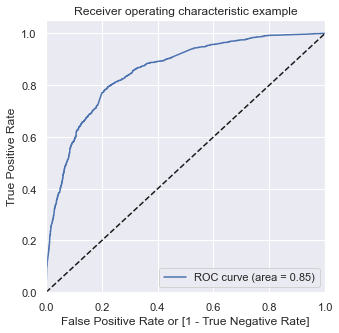

In [2130]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cut-off point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [2131]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.273007,641410,0,1,1,1,0,0,0,0,0,0,0
1,0,0.171075,597687,0,1,1,0,0,0,0,0,0,0,0
2,0,0.210706,626825,0,1,1,1,0,0,0,0,0,0,0
3,0,0.800156,587928,1,1,1,1,1,1,1,1,1,1,0
4,0,0.180737,622366,0,1,1,0,0,0,0,0,0,0,0


In [2132]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.553649  0.975264  0.293853
0.2   0.2  0.702072  0.893755  0.583958
0.3   0.3  0.760204  0.832522  0.715642
0.4   0.4  0.780148  0.712084  0.822089
0.5   0.5  0.788497  0.634631  0.883308
0.6   0.6  0.771181  0.535685  0.916292
0.7   0.7  0.752319  0.448094  0.939780
0.8   0.8  0.726036  0.335361  0.966767
0.9   0.9  0.677025  0.169505  0.989755


<Figure size 1440x1080 with 0 Axes>

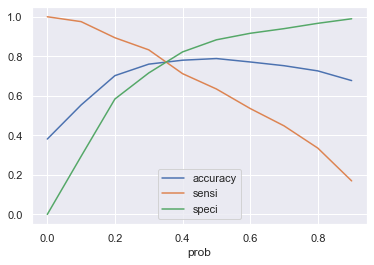

In [2133]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(20,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [2134]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.273007,641410,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.171075,597687,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.210706,626825,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.800156,587928,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.180737,622366,0,1,1,0,0,0,0,0,0,0,0,0


In [2135]:
# Printing the Metrics Accuracy, Sensitivity, Specicity
acc,sensi,speci=metrices_(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
print('Accuracy: {}, Sensitivity {}, specifitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7801484230055659, Sensitivity 0.7120843471208435, specifitiy 0.8220889555222389  


In [2136]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3535,  467],
       [ 901, 1565]], dtype=int64)

#### Precision and Recall

In [2137]:
# Finding the Precision Score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7115072933549432

In [2138]:
# Finding the Recall Score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7120843471208435

In [2139]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

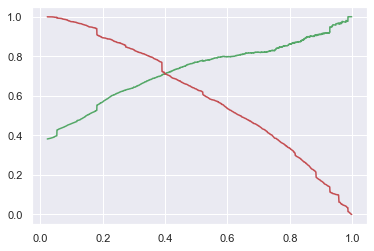

In [2140]:
plt.plot(thresholds, p[:-1], "g-",label='Precision')
plt.plot(thresholds, r[:-1], "r-",label='Recall')
# plt.savefig('precision-recall_curve',dpi=300,transparent=True)
plt.show()

# Making prediction on the test set

In [2141]:
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']]=scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])

In [2142]:
#Adding constant
X_test_sm = sm.add_constant(X_test[col])
#Making prediction
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

Lead Number
619003    0.797269
636884    0.927959
590281    0.296902
579892    0.052526
617929    0.883476
579992    0.568445
643289    0.355037
581637    0.270036
588474    0.033332
609001    0.368740
dtype: float64

In [2143]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
Lead Number,
619003,0.797269
636884,0.927959
590281,0.296902
579892,0.052526
617929,0.883476


In [2144]:
# Converting y_pred to a dataframe which is an array
y_pred_test = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Lead Number'] = y_test_df.index

In [2145]:
# Removing index for both dataframes to append them side by side 
y_pred_test.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2146]:
# Appending y_test_df and y_pred_test
y_pred_final = pd.concat([y_test_df, y_pred_test],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,1,619003,0.797269
1,1,636884,0.927959
2,1,590281,0.296902
3,0,579892,0.052526
4,1,617929,0.883476


In [2147]:
y_pred_final['final_test_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted
0,1,619003,0.797269,1
1,1,636884,0.927959,1
2,1,590281,0.296902,0
3,0,579892,0.052526,0
4,1,617929,0.883476,1


In [2148]:
acc,sensi,speci=metrices_(y_pred_final.Converted,y_pred_final.final_test_predicted)
print('Accuracy: {}, Sensitivity {}, specitiy {}  '.format(acc,sensi,speci))

Accuracy: 0.7813852813852814, Sensitivity 0.7123287671232876, specitiy 0.8264758497316637  


#### Assigning Lead Score in the data frame with respect to Lead Number

In [2149]:
# making new df with lead score
lead_score_df=pd.DataFrame()
df1=y_train_pred_final[['Lead Number','Converted_Prob']]
df2=y_pred_final[['Lead Number','Converted_Prob']]

In [2150]:
lead_score_df=df1.append(df2,ignore_index=True)

In [2151]:
# Assigning the value to the Lead Score by Multiplying 100
lead_score_df['Lead Score']=lead_score_df['Converted_Prob'].apply(lambda x: round((x*100),2))

In [2152]:
# dropping Converted_Prob
lead_score_df.drop('Converted_Prob',1,inplace=True)
lead_score_df.head()

,Lead Number,Lead Score
0,641410,27.30
1,597687,17.11
2,626825,21.07
3,587928,80.02
4,622366,18.07


In [2153]:
y_pred_final["Lead Score"] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_test_predicted,Lead Score
0,1,619003,0.797269,1,80
1,1,636884,0.927959,1,93
2,1,590281,0.296902,0,30
3,0,579892,0.052526,0,5
4,1,617929,0.883476,1,88


### 1. Test Model Metrices
#### Accuracy: 0.7813852813852814, Sensitivity 0.7123287671232876, specitiy 0.8264758497316637

### 2. Train Model Metrices
#### Accuracy: 0.7801484230055659, Sensitivity 0.7120843471208435, specifitiy 0.8220889555222389

### 3. Ordering the dataset in the descending order of lead score

In [2154]:
y_pred_final.sort_values(by="Lead Score", ascending=False)

,Converted,Lead Number,Converted_Prob,final_test_predicted,Lead Score
2589,1,593208,0.995832,1,100
322,1,657590,0.986561,1,99
776,1,622493,0.986165,1,99
2578,1,614906,0.986165,1,99
33,1,585477,0.986165,1,99
...,...,...,...,...,...
2712,0,634783,0.021430,0,2
1154,0,579744,0.021434,0,2
195,0,606165,0.022631,0,2
1112,0,621641,0.022791,0,2


### 4. Finding Hot Leads

In [2155]:
hot_leads=y_pred_final.loc[y_pred_final["Lead Score"]>=85]
hot_leads

,Converted,Lead Number,Converted_Prob,final_test_predicted,Lead Score
1,1,636884,0.927959,1,93
4,1,617929,0.883476,1,88
12,1,631565,0.894319,1,89
13,1,631758,0.886900,1,89
25,1,643946,0.861174,1,86
...,...,...,...,...,...
2700,1,612637,0.865565,1,87
2710,1,608330,0.976265,1,98
2734,1,605767,0.881561,1,88
2740,1,596412,0.992108,1,99


232 leads are found to be hot leads

### 5. Important features in the model

In [2156]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website             4.716080
Lead Source_Reference                    3.005189
Last Activity_SMS Sent                   2.628775
Last Activity_Email Opened               1.566853
Last Activity_Other                      1.543238
Last Activity_Email Link Clicked         1.054176
Total Time Spent on Website              0.983178
Last Activity_Page Visited on Website    0.877358
Specialization_Healthcare Management     0.272626
Last Activity_Olark Chat Conversation    0.185733
Lead Source_Google                       0.034802
Specialization_International Business   -0.465212
Specialization_Finance Management       -0.531942
Lead Origin_Landing Page Submission     -0.942761
Lead Origin_Lead Import                 -0.978240
const                                   -1.675798
dtype: float64

## Conclusion

- The company **should make calls** to the leads coming from the `lead sources "Welingak Websites"`  and `"Reference"` as these are more likely to get converted.
- The company **should make calls** to the leads whose `last activity` was `SMS Sent` or `Email Opened` as they are more likely to get converted.
- The company **should make calls** to the leads who `spent "more time on the websites"` as these are more likely to get converted.
- The company **should make calls** to the leads who `clicked the email link` as they are not likely to get converted.
- The company **should not make calls** to the leads whose `Specialization` was `"International Business" or "Finance Management"` as they are not likely to get converted.
- The company **should not make calls** to the leads whose `lead origin` is `"Landing Page Submission"` as they are not likely to get converted.